In [1]:
import pandas as pd

In [2]:
df_bbc = pd.read_csv("BirthsByCounty1985_2020_cleaned.csv")

In [3]:
df_bbc.head()

Year                  County  All Births  First Births  Married Births  \
0  1985               ROI Total     62388.0           NaN         57106.0   
1  1985             Dublin City      6645.0           NaN          5132.0   
2  1985                  Fingal         NaN           NaN             NaN   
3  1985  Dun Laoghaire Rathdown       878.0           NaN           754.0   
4  1985            South Dublin     10123.0           NaN          9280.0   

   Unmarried Births  Avg Age Mother  Avg Age First Time  
0            5282.0            29.3                26.0  
1            1513.0            28.0                 NaN  
2               NaN             NaN                 NaN  
3             124.0            29.8                 NaN  
4             843.0            29.3                 NaN

In [4]:
# let's drop the columns we don't need

df_bbc.drop(columns=["Married Births", "Unmarried Births"], inplace=True)

In [5]:
df_bbc.head()

Year                  County  All Births  First Births  Avg Age Mother  \
0  1985               ROI Total     62388.0           NaN            29.3   
1  1985             Dublin City      6645.0           NaN            28.0   
2  1985                  Fingal         NaN           NaN             NaN   
3  1985  Dun Laoghaire Rathdown       878.0           NaN            29.8   
4  1985            South Dublin     10123.0           NaN            29.3   

   Avg Age First Time  
0                26.0  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

In [6]:
# now let's drop the county rows. For the initial analysis we'll only need the ROI totals

df_bbc.drop(df_bbc[df_bbc.County != "ROI Total"].index, inplace=True)

In [7]:
df_bbc.head()

Year     County  All Births  First Births  Avg Age Mother  \
0    1985  ROI Total     62388.0           NaN            29.3   
37   1986  ROI Total     61620.0           NaN            29.3   
74   1987  ROI Total     58433.0           NaN            29.4   
111  1988  ROI Total     54600.0           NaN            29.5   
148  1989  ROI Total     52018.0       16994.0            29.6   

     Avg Age First Time  
0                  26.0  
37                 26.1  
74                 26.2  
111                26.4  
148                26.3

In [8]:
import seaborn as sns

/home/damien/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


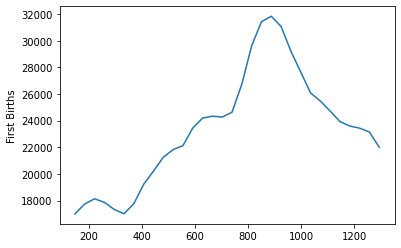

In [9]:
sns.lineplot(df_bbc.index, df_bbc["First Births"])

/home/damien/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


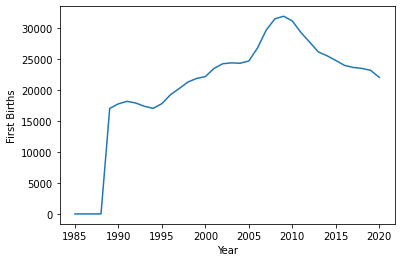

In [10]:
# let's temporarily replace the NaN values with 0's to check their distribution in the set

sns.lineplot(df_bbc.Year, df_bbc["First Births"].fillna(0))

So we can see here that we are missing the firt few years of data for this observation.

In [11]:
df_bbc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 1295
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                36 non-null     int64  
 1   County              36 non-null     object 
 2   All Births          36 non-null     float64
 3   First Births        32 non-null     float64
 4   Avg Age Mother      36 non-null     float64
 5   Avg Age First Time  36 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.0+ KB


/home/damien/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


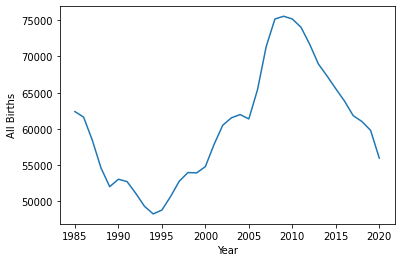

In [12]:
sns.lineplot(df_bbc.Year, df_bbc["All Births"])

In [13]:
df_bbc.to_csv("births_by_county_ROI_only.csv", index=False)

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

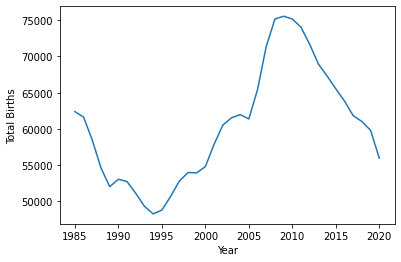

In [3]:
df = pd.read_csv("births_by_county_ROI_only.csv")
plt.plot(df.Year, df["All Births"])
plt.xlabel("Year")
plt.ylabel("Total Births")
plt.savefig("plots/bbc_tot_births")